In [6]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [7]:
cell_df = pd.read_csv('cell_samples.csv')
cell_df.head(10)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


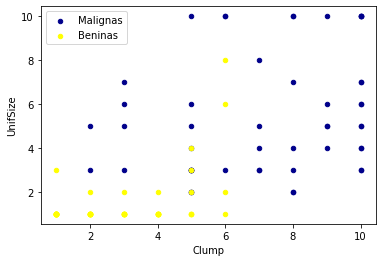

In [8]:
# Hacemos una grafica exploratoria
ax = cell_df[cell_df['Class']==4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='Malignas');
cell_df[cell_df['Class']==2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='Beninas', ax=ax);
plt.show()

In [9]:
# Ver tipos de datos de las columnas
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

Parece que la columna BareNuc incluye algunos valores que no son numéricos. Podemos eliminar esas filas:

In [10]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [14]:
cell_df.head(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [21]:
feacture_df = cell_df[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']]
#Crear el array con las caracteristicas
X = np.asarray(feacture_df)
X[0:10]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1],
       [ 8, 10, 10,  8,  7, 10,  9,  7,  1],
       [ 1,  1,  1,  1,  2, 10,  3,  1,  1],
       [ 2,  1,  2,  1,  2,  1,  3,  1,  1],
       [ 2,  1,  1,  1,  2,  1,  1,  1,  5],
       [ 4,  2,  1,  1,  2,  1,  2,  1,  1]], dtype=int64)

Queremos que el modelo prediga el valor de la columna Class (si es benigno (=2), si es maligno (=4)). Como este campo puede tener uno de dos valores posibles, necesitaremos cambiar su nivel de medición para reflejar eso.

In [20]:
cell_df['Class'] = cell_df['Class'].astype('int')
# Creamos un array de y que sera la variable dependiente contiene la columna Class
y = np.asarray(cell_df['Class'])
y[0:20]

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2])

Train/Test dataset
Ahora, dividimos el set de datos en entrenamiento y prueba:

In [24]:
#train_test_split siempre se va usar asi
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Train set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


Modelado (SVM con aprendizaje Scikit)
El algoritmo SVM ofrece elegir funciones para realizar su procesamiento. Básicamente, mapear los datos en un espacio dimensional más alto se llama kernelling. La función matemática utilizada para la transformación se conoce como la función kernel, y puede ser de distintos tipos, a ser:

Lineal
Polimonial
Función de base Radial (RBF)
Sigmoide
Cada una de estas funciones tiene sus características, pros y contras y su ecuación, pero como no hay una forma sencilla de saber la función que mejor funcionaría, elegimos utilizar diferentes funciones y comparar los resultados. Utilicemos la función por omisión, RBF (Función Basada en Radio) para este lab.

In [25]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) #Creamos nuetro modelo

SVC()

In [28]:
#Vamos hacer las prediccion
prediccion = clf.predict(X_test)
prediccion[0:10]

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2])

### Evaluación

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [30]:
def plot_confusion_matrix(cm,classes, normalize=False, title='Confusión matrix', cmap=plt.cm.Blues):
    if normalize:
        cm =cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Matriz de confusión normalizada')
    else:
        print('Matriz de confusión, sin normalización')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt= '.2f' if normalize else 'd'
    thresh= cm.max()/2
    
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt),
        horizontalalignment='center',
        color='white'
        if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('Etiqueta del dataset')
    plt.xlabel('Etiqueta predecida')

In [32]:
y_test

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2,
       4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2])

In [33]:
prediccion

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2])

Matriz de confusión, sin normalización
[[83  4]
 [ 1 49]]


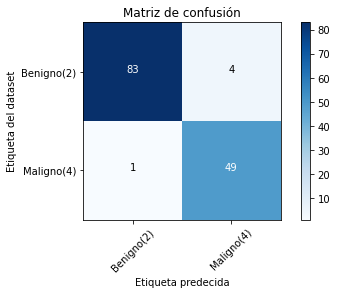

In [38]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, prediccion, labels=[2,4])
np.set_printoptions(precision=2)
# Trazar matriz de confusión no normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benigno(2)','Maligno(4)'], normalize=False, title='Matriz de confusión')

Se puede utilizar facilmente el f1_score de la librería sklearn:

In [39]:
from sklearn.metrics import f1_score
f1_score(y_test,prediccion, average='weighted')

0.9637150064588158

## 96 % de prediciones correctas!!!